### NO2 emission and COVID Lockdown effects

The COVID-19 pandemic has had a significant effect on reducing both human and industrial activities, leading to certain positive outcomes such as a decrease in air pollutants, as discussed in this [paper](https://ieeexplore.ieee.org/abstract/document/9617331). 

Therefore, in this notebook, we aim to explore the trend in air pollution, focusing on the NO2 product of the Sentinel 5P collection. We will simply, compare the situation before and after the onset of COVID-19 lockdown in the Delhi region of India.

Further information on Sentinel-5P can be found the following links:

* https://documentation.dataspace.copernicus.eu/Data/SentinelMissions/Sentinel5P.html
* https://www.esa.int/Applications/Observing_the_Earth/Copernicus/Sentinel-5P/Sentinel-5P_brings_air_pollution_into_focus


In [2]:
# import necessary packages
import openeo
from openeo.processes import min, max, mean
import scipy
import numpy as np

In [3]:
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


### 1. Create a datacube for period during COVID lockdowns

In [4]:
aoi = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {},
            "geometry": {
                "coordinates": [
                    [
                        [77.11, 28.69],
                        [77.11, 28.56],
                        [77.29, 28.56],
                        [77.29, 28.69],
                        [77.11, 28.69],
                    ]
                ],
                "type": "Polygon",
            },
        }
    ],
}

In [5]:
s5covid = connection.load_collection(
    "SENTINEL_5P_L2",
    temporal_extent=["2020-06-01", "2021-06-30"],
    spatial_extent={"west": 77.11, "south": 28.56, "east": 77.29, "north": 28.69},
    bands=["NO2"],
)

In [6]:
# Now aggregate by day to avoid having multiple data per day
s5covid = s5covid.aggregate_temporal_period(reducer="mean", period="day")

# let's create a spatial aggregation to generate mean timeseries data
s5covid = s5covid.aggregate_spatial(reducer="mean", geometries=aoi)

### 2. Let's repeat the same process for Post Covid Situation

In [8]:
# Create a datacube for period after COVID lockdowns

s5post = connection.load_collection(
    "SENTINEL_5P_L2",
    temporal_extent=["2022-06-01", "2023-06-30"],
    spatial_extent={"west": 77.11, "south": 28.56, "east": 77.29, "north": 28.69},
    bands=["NO2"],
)

# Now aggregate by day to avoid having multiple data per day
s5post = s5post.aggregate_temporal_period(reducer="mean", period="day")

# Now create a spatial aggregation to generate mean timeseries data
s5post = s5post.aggregate_spatial(reducer="mean", geometries=aoi)

Finally we execute them as batch jobs and download the results as CSVs. They are further plotted as shown below to study the data.

In [9]:
# Lets check if it is good or not
job = s5covid.execute_batch(title="NO2 during Covid", outputfile="during_covid.nc")

0:00:00 Job 'j-2401094851a04db380f7a9813a2b4e61': send 'start'
0:00:15 Job 'j-2401094851a04db380f7a9813a2b4e61': queued (progress N/A)
0:00:20 Job 'j-2401094851a04db380f7a9813a2b4e61': queued (progress N/A)
0:00:36 Job 'j-2401094851a04db380f7a9813a2b4e61': queued (progress N/A)
0:00:44 Job 'j-2401094851a04db380f7a9813a2b4e61': queued (progress N/A)
0:01:20 Job 'j-2401094851a04db380f7a9813a2b4e61': running (progress N/A)
0:01:33 Job 'j-2401094851a04db380f7a9813a2b4e61': running (progress N/A)
0:01:48 Job 'j-2401094851a04db380f7a9813a2b4e61': running (progress N/A)
0:02:08 Job 'j-2401094851a04db380f7a9813a2b4e61': running (progress N/A)
0:02:32 Job 'j-2401094851a04db380f7a9813a2b4e61': running (progress N/A)
0:03:02 Job 'j-2401094851a04db380f7a9813a2b4e61': running (progress N/A)
0:03:39 Job 'j-2401094851a04db380f7a9813a2b4e61': running (progress N/A)
0:04:26 Job 'j-2401094851a04db380f7a9813a2b4e61': running (progress N/A)
0:05:24 Job 'j-2401094851a04db380f7a9813a2b4e61': running (progre

In [10]:
# Lets check if it is good or not
job = s5post.execute_batch(title="NO2 Post-Covid", outputfile="post_covid.nc")

0:00:00 Job 'j-2401095f84234e3a9a9f20e23a29b5e2': send 'start'
0:00:23 Job 'j-2401095f84234e3a9a9f20e23a29b5e2': created (progress N/A)
0:00:29 Job 'j-2401095f84234e3a9a9f20e23a29b5e2': created (progress N/A)
0:00:35 Job 'j-2401095f84234e3a9a9f20e23a29b5e2': created (progress N/A)
0:00:43 Job 'j-2401095f84234e3a9a9f20e23a29b5e2': created (progress N/A)
0:00:53 Job 'j-2401095f84234e3a9a9f20e23a29b5e2': running (progress N/A)
0:01:38 Job 'j-2401095f84234e3a9a9f20e23a29b5e2': running (progress N/A)
0:01:53 Job 'j-2401095f84234e3a9a9f20e23a29b5e2': running (progress N/A)
0:02:13 Job 'j-2401095f84234e3a9a9f20e23a29b5e2': running (progress N/A)
0:02:37 Job 'j-2401095f84234e3a9a9f20e23a29b5e2': running (progress N/A)
0:03:07 Job 'j-2401095f84234e3a9a9f20e23a29b5e2': running (progress N/A)
0:03:44 Job 'j-2401095f84234e3a9a9f20e23a29b5e2': running (progress N/A)
0:04:31 Job 'j-2401095f84234e3a9a9f20e23a29b5e2': running (progress N/A)
0:05:49 Job 'j-2401095f84234e3a9a9f20e23a29b5e2': finished (p

### Let's plot the result

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# load the results
predata = xr.load_dataset("during_covid.nc")
postdata = xr.load_dataset("post_covid.nc")

Let's calculate the mean along-time dimension for the window size of 30days.

In [15]:
predata = predata.rolling(t=30).mean()
postdata = postdata.rolling(t=30).mean()

Text(0.5, 0, 'Post COVID')

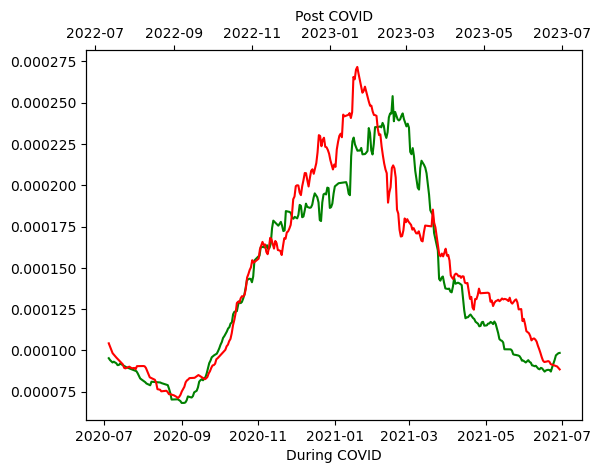

In [26]:
fig, ax1 = plt.subplots(dpi=100)
ax1.plot(predata.t, predata.NO2.to_numpy().flatten(), color="g")
ax1.set_xlabel("During COVID")
ax2 = ax1.twiny()
ax2.plot(postdata.t, postdata.NO2.to_numpy().flatten(), color="r")
ax2.set_xlabel("Post COVID")

The red line in the post illustrates the NO2 concentration duration during COVID, and the green line represents the period after COVID for similar months of various years. Although the shift is not substantial, there's a minor decline in NO2 levels. 
 
Thus, as a reference to this notebook, additional scenarios can be explored using the Sentinel 5P data within the Copernicus Dataspace Ecosystem.

The red line in the plot shows the NO2 concentration during the COVID period over the selected region in Delhi, while the green line represents the post-COVID period for equivalent months in various years. It shows that although the shift is not substantial, there's a minor decline in NO2 levels.
Thuslytaking this nonotebo as a reference caseok, further scenarios can be investigated using Sentinel 5P data within the Copernicus Data Space Ecosyst, such as PM2.5 concentration, ozone layer depletion, SO2 concentration, etcem.